In [ ]:
import pandas as pd
import numpy as np

In [ ]:
link = pd.read_csv("links.csv")

In [ ]:
tag = pd.read_csv("tags.csv")
movies = pd.read_csv("movies.csv")
movies_crawling_sample = pd.read_csv("movies_crawling_sample.csv")
ratings = pd.read_csv("ratings.csv")

#전처리

##행 제거

In [ ]:
movies_crawling_sample = movies_crawling_sample.drop(columns=['Unnamed: 0'])

##장르 구분자 변경

In [ ]:
movies_crawling_sample[movies_crawling_sample['genres'].str.contains(' ')]

,movieId,title,genres,storyline,country,language,director,release_year,runtime,age_rating,tag_1,tag_2,tag_3


In [ ]:
movies_crawling_sample['genres'] = movies_crawling_sample['genres'].str.replace('|',' ', regex=True)

## title 연도 구분

In [ ]:
movies_crawling_sample[['title', 'year']] = movies_crawling_sample['title'].str.rsplit(' ', n=1, expand=True)

In [ ]:
movies_crawling_sample['year'] = movies_crawling_sample['year'].apply(lambda x: x[1:-1])
movies_crawling_sample['year'] = movies_crawling_sample['year'].astype(int)

##ratings 추가


In [ ]:
df = pd.merge(ratings, movies_crawling_sample, on='movieId', how='left')

밑에 있는 코드는 샘플이라 결측치 제거

In [ ]:
df = df.dropna()

#ITEM + RATINGS with fillna(0)

##itme_user 유사도 행렬 준비

In [ ]:
movie_user = df.pivot_table(values='rating', index='title', columns='userId')
movie_user

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
"'burbs, The",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'night Mother,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10 Things I Hate About You,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN
101 Dalmatians,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN
101 Dalmatians (One Hundred and One Dalmatians),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zero Effect,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zeus and Roxanne,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zone 39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
movie_user_tmp = movie_user.copy().fillna(0)

##유사도 계산

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

movie_similarity_matrix = cosine_similarity(movie_user_tmp)
movie_similarity_matrix.shape

(1696, 1696)

In [ ]:
movie_titles = movie_user.index
movie_titles

Index([''burbs, The', ''night Mother', '10 Things I Hate About You',
       '101 Dalmatians', '101 Dalmatians (One Hundred and One Dalmatians)',
       '13th Warrior, The', '187 (One Eight Seven)',
       '1984 (Nineteen Eighty-Four)', '20 Dates', '200 Cigarettes',
       ...
       'Young Guns II', 'Young Poisoner's Handbook, The',
       'Young Sherlock Holmes', 'Your Friends and Neighbors',
       'Zed & Two Noughts, A', 'Zero Effect', 'Zeus and Roxanne', 'Zone 39',
       'eXistenZ', '¡Three Amigos!'],
      dtype='object', name='title', length=1696)

In [ ]:
# 영화-영화 유저관람 내역에 대한 유사도
movie_similarity = pd.DataFrame(movie_similarity_matrix,
                                index=movie_titles, columns=movie_titles)
print(movie_similarity.shape)
movie_similarity.head()

(1696, 1696)


title,"'burbs, The",'night Mother,10 Things I Hate About You,101 Dalmatians,101 Dalmatians (One Hundred and One Dalmatians),"13th Warrior, The",187 (One Eight Seven),1984 (Nineteen Eighty-Four),20 Dates,200 Cigarettes,...,Young Guns II,"Young Poisoner's Handbook, The",Young Sherlock Holmes,Your Friends and Neighbors,"Zed & Two Noughts, A",Zero Effect,Zeus and Roxanne,Zone 39,eXistenZ,¡Three Amigos!
title,,,,,,,,,,,,,,,,,,,,,
"'burbs, The",1.000000,0.071429,0.180401,0.125357,0.254537,0.201098,0.165643,0.203289,0.123718,0.242977,...,0.105657,0.0,0.272545,0.000000,0.000000,0.155553,0.142857,0.142857,0.211467,0.372876
'night Mother,0.071429,1.000000,0.092513,0.091168,0.171736,0.063986,0.000000,0.000000,0.000000,0.000000,...,0.184900,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.216295,0.180009
10 Things I Hate About You,0.180401,0.092513,1.000000,0.282549,0.270490,0.258683,0.120922,0.167080,0.038457,0.172503,...,0.078686,0.0,0.121497,0.088813,0.108860,0.169472,0.111016,0.111016,0.167085,0.160426
101 Dalmatians,0.125357,0.091168,0.282549,1.000000,0.335155,0.056147,0.000000,0.096901,0.063163,0.137834,...,0.037928,0.0,0.097079,0.145870,0.178796,0.132848,0.000000,0.000000,0.094899,0.127186
101 Dalmatians (One Hundred and One Dalmatians),0.254537,0.171736,0.270490,0.335155,1.000000,0.179939,0.072410,0.054308,0.059491,0.086547,...,0.079385,0.0,0.140961,0.000000,0.000000,0.087999,0.000000,0.000000,0.130010,0.213821


##평점예측

In [ ]:
from tqdm.notebook import tqdm

def modeling(similarity_matrix, data):
    df_pred_all = pd.DataFrame()
    titles = similarity_matrix.index
    all_users = sorted(data['userId'].unique())
    n_titles = len(titles)

    for user in tqdm(all_users):
        idx = data[data['userId'] == user].index

        # 유사도
        watched_movies = data.loc[idx, 'title'].tolist()
        sub_sim_mat = similarity_matrix.loc[watched_movies]
        sub_sim_mat = sub_sim_mat.T.to_numpy()
        sim_N = np.sum(sub_sim_mat, axis=1) + 1


        # 평점 예측
        watched_movies_y = data.loc[idx, 'rating']
        watched_movies_y = np.array(watched_movies_y.tolist()).reshape(-1, 1)

        pred_y = np.matmul(sub_sim_mat, watched_movies_y).flatten() / sim_N

        users_list = [user] * n_titles
        cur_pred = pd.DataFrame(zip(users_list, titles, pred_y),
                                columns=['userId', 'title', 'pred_rating'])

        # 결과 기록
        df_pred_all = pd.concat([df_pred_all, cur_pred], axis=0)
    return df_pred_all

In [ ]:
df_pred_all = modeling(movie_similarity, df)
df_pred_all

  0%|          | 0/608 [00:00<?, ?it/s]

,userId,title,pred_rating
0,1,"'burbs, The",4.128709
1,1,'night Mother,3.988062
2,1,10 Things I Hate About You,4.169523
3,1,101 Dalmatians,4.132060
4,1,101 Dalmatians (One Hundred and One Dalmatians),4.221425
...,...,...,...
1691,610,Zero Effect,4.004900
1692,610,Zeus and Roxanne,3.717793
1693,610,Zone 39,3.717793
1694,610,eXistenZ,3.958392


#ITEM + RATINGS with KNN

##결측치 knn으로 채우기

In [ ]:
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.metrics.pairwise import cosine_similarity


# 0 값을 NaN으로 변경
movie_user_tmp.replace(0, np.nan, inplace=True)

def knn_impute(movie_user_tmp, k_neighbors=20):
    # KNN Imputer 초기화
    imputer = KNNImputer(n_neighbors=k_neighbors)

    # KNN Imputer를 사용하여 NaN 값을 채움
    movie_user_imputed = imputer.fit_transform(movie_user_tmp)

    # 채워진 데이터를 DataFrame으로 변환
    movie_user_imputed_df = pd.DataFrame(movie_user_imputed, columns=movie_user_tmp.columns)

    return movie_user_imputed_df

# KNN을 사용하여 5개의 이웃을 기반으로 NaN 값을 채움
movie_user_imputed = knn_impute(movie_user_tmp, k_neighbors=5)

# 채워진 데이터를 출력
movie_user_imputed


userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
0,4.2,4.5,1.7,2.8,3.4,3.8,3.7,2.8,2.6,2.9,...,4.1,2.8,3.4,3.4,3.3,3.8,3.4,2.8,3.2,3.7
1,4.2,4.5,0.5,3.0,3.8,4.2,3.1,3.4,3.6,2.5,...,4.3,3.8,4.0,3.8,3.8,3.5,3.8,3.3,3.0,4.2
2,4.6,4.5,2.1,3.2,3.4,3.4,4.2,3.0,3.0,2.9,...,4.1,3.6,3.0,3.4,5.0,3.2,4.6,2.9,3.0,3.1
3,4.6,4.5,1.7,3.8,3.6,3.4,3.8,3.4,2.6,2.9,...,4.0,3.4,4.0,3.2,3.0,3.4,3.4,2.4,3.0,4.0
4,4.8,4.5,1.7,3.8,3.8,3.4,3.3,3.6,3.4,2.9,...,4.0,3.4,4.0,3.0,3.5,3.8,3.8,2.6,3.0,4.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1691,4.6,4.5,0.5,3.8,3.8,3.8,3.8,4.0,3.4,2.9,...,4.3,3.0,5.0,3.2,3.2,3.3,4.2,3.0,3.2,4.2
1692,4.2,4.5,1.3,3.2,3.4,2.8,3.8,3.0,3.2,2.3,...,4.0,2.4,2.2,3.6,2.9,3.1,3.2,1.5,3.2,3.6
1693,4.2,4.5,1.3,3.2,3.4,3.4,3.8,3.8,3.0,2.3,...,4.0,3.4,3.0,3.2,3.5,2.9,3.2,2.4,3.2,3.6
1694,4.4,4.5,2.0,3.8,3.8,3.6,3.3,3.4,3.4,2.5,...,4.5,3.0,5.0,3.6,3.5,4.1,3.8,4.5,3.2,4.0


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

movie_similarity_knn = cosine_similarity(movie_user_imputed)
movie_similarity_knn.shape

(1696, 1696)

In [ ]:
import numpy as np

# movie_similarity_knn이 DataFrame이라고 가정합니다.
min_val = movie_similarity_knn.min(axis=0).min()  # axis를 명시적으로 지정
max_val = movie_similarity_knn.max(axis=0).max()

# 분모가 0이 되지 않도록 주의합니다.
if (max_val - min_val) != 0:
    movie_similarity_knn = (movie_similarity_knn - min_val) / (max_val - min_val)



In [ ]:
movie_similarity_knn

array([[1.        , 0.67896407, 0.66199685, ..., 0.73724246, 0.63238779,
        0.68089944],
       [0.67896407, 1.        , 0.7009077 , ..., 0.73849413, 0.70909278,
        0.7148364 ],
       [0.66199685, 0.7009077 , 1.        , ..., 0.68697588, 0.67510906,
        0.70873729],
       ...,
       [0.73724246, 0.73849413, 0.68697588, ..., 1.        , 0.6387948 ,
        0.76632324],
       [0.63238779, 0.70909278, 0.67510906, ..., 0.6387948 , 1.        ,
        0.63438468],
       [0.68089944, 0.7148364 , 0.70873729, ..., 0.76632324, 0.63438468,
        1.        ]])

In [ ]:
movie_titles = movie_user.index
movie_titles

Index([''burbs, The', ''night Mother', '10 Things I Hate About You',
       '101 Dalmatians', '101 Dalmatians (One Hundred and One Dalmatians)',
       '13th Warrior, The', '187 (One Eight Seven)',
       '1984 (Nineteen Eighty-Four)', '20 Dates', '200 Cigarettes',
       ...
       'Young Guns II', 'Young Poisoner's Handbook, The',
       'Young Sherlock Holmes', 'Your Friends and Neighbors',
       'Zed & Two Noughts, A', 'Zero Effect', 'Zeus and Roxanne', 'Zone 39',
       'eXistenZ', '¡Three Amigos!'],
      dtype='object', name='title', length=1696)

In [ ]:
# 영화-영화 유저관람 내역에 대한 유사도
movie_similarity_knn = pd.DataFrame(movie_similarity_knn,
                                index=movie_titles, columns=movie_titles)
print(movie_similarity_knn.shape)
movie_similarity_knn.head()

(1696, 1696)


title,"'burbs, The",'night Mother,10 Things I Hate About You,101 Dalmatians,101 Dalmatians (One Hundred and One Dalmatians),"13th Warrior, The",187 (One Eight Seven),1984 (Nineteen Eighty-Four),20 Dates,200 Cigarettes,...,Young Guns II,"Young Poisoner's Handbook, The",Young Sherlock Holmes,Your Friends and Neighbors,"Zed & Two Noughts, A",Zero Effect,Zeus and Roxanne,Zone 39,eXistenZ,¡Three Amigos!
title,,,,,,,,,,,,,,,,,,,,,
"'burbs, The",1.000000,0.678964,0.661997,0.693281,0.642775,0.755706,0.741516,0.690506,0.648588,0.721389,...,0.761910,0.699819,0.670269,0.653325,0.582472,0.660984,0.697855,0.737242,0.632388,0.680899
'night Mother,0.678964,1.000000,0.700908,0.670005,0.699690,0.655168,0.722912,0.739018,0.712472,0.755933,...,0.700501,0.798136,0.758440,0.784403,0.772811,0.750074,0.654364,0.738494,0.709093,0.714836
10 Things I Hate About You,0.661997,0.700908,1.000000,0.662517,0.713897,0.676435,0.691186,0.721522,0.697779,0.730320,...,0.664951,0.733549,0.741534,0.676171,0.644806,0.699655,0.613136,0.686976,0.675109,0.708737
101 Dalmatians,0.693281,0.670005,0.662517,1.000000,0.707397,0.718668,0.680395,0.707154,0.637000,0.701953,...,0.664775,0.713383,0.689846,0.690974,0.652857,0.683030,0.637151,0.700620,0.666101,0.684817
101 Dalmatians (One Hundred and One Dalmatians),0.642775,0.699690,0.713897,0.707397,1.000000,0.616196,0.633971,0.698077,0.684125,0.752805,...,0.628555,0.724467,0.770659,0.717396,0.680707,0.782610,0.585646,0.645370,0.733636,0.667128


##평점 예측

In [ ]:
df_pred_all_knn = modeling(movie_similarity_knn, df)
df_pred_all_knn

  0%|          | 0/608 [00:00<?, ?it/s]

,userId,title,pred_rating
0,1,"'burbs, The",4.258699
1,1,'night Mother,4.285635
2,1,10 Things I Hate About You,4.268985
3,1,101 Dalmatians,4.264044
4,1,101 Dalmatians (One Hundred and One Dalmatians),4.296789
...,...,...,...
1691,610,Zero Effect,4.071551
1692,610,Zeus and Roxanne,3.947368
1693,610,Zone 39,3.974472
1694,610,eXistenZ,4.067988


###평점 분포 시각화

In [ ]:
data = df_pred_all_knn

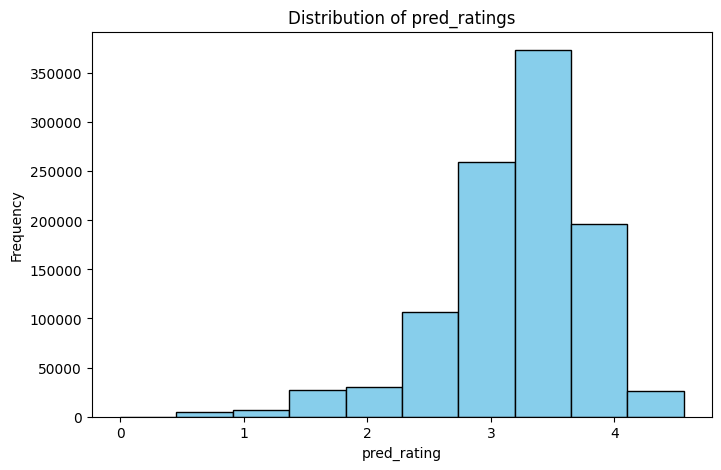

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


df = pd.DataFrame(data)

# 히스토그램
plt.figure(figsize=(8, 5))
plt.hist(df['pred_rating'], bins=10, edgecolor='black', color='skyblue')
plt.title('Distribution of pred_ratings')
plt.xlabel('pred_rating')
plt.ylabel('Frequency')
plt.show()
